In [ ]:
import pandas as pd

In [ ]:
test = pd.read_csv('Final_Test.csv')

In [ ]:
train = pd.read_csv("Final_Train.csv")

In [ ]:
train.head()

,AGRA,AIZAWL,ALAPPUZHA,ALLAHABAD,ALWAR,AMRAVATI,AMRITSAR,BATHINDA,BHARUCH,BHOPAL,BULANDSHAHR,CACHAR,CHANDIGARH,CHENNAI,CHITTOOR,COIMBATORE,CUTTACK,DAKSHINAKANNADA,DEHRADUN,DHANBAD,DIBRUGARH,DURG,EASTKHASIHILLS,ERNAKULAM,FATEHGARHSAHIB,FIROZABAD,GANJAM,GHAZIABAD,GOLAGHAT,GUNTUR,GWALIOR,HASSAN,INDORE,JABALPUR,JAIPUR,JALANDHAR,JALGAON,JAMNAGAR,JHANSI,JODHPUR,...,PUNE,RAJKOT,RANCHI,RAYAGADA,SAGAR,SALEM,SANGLI,SIRMAUR,SOLAN,SOLAPUR,SONBHADRA,SONITPUR,SOUTHGOA,SURAT,THANE,THIRUVANANTHAPURAM,VADODARA,VALSAD,VARANASI,VISAKHAPATNAM,year,quarter,rainfall,relative_humidity,average_temperature,NSP Total/ NewMicConf Total,Relapse Total,NSN Total,so2,no2,rspm,Pediatric,Geriatric,15-24,25-34,35-44,45-54,55-64,NEP Total,SumOfHIV_infected
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2008,1,2.6,21.728250,18.952113,491,109,421,7.803030,23.744767,215.715909,24,26,111,102,101,73,54,275,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2008,2,150.8,35.571308,30.605233,795,127,551,7.341732,22.504294,184.648809,31,37,218,186,150,98,75,391,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2008,3,368.9,81.344806,28.749821,649,118,383,7.021000,17.422785,136.511628,30,30,190,132,131,84,52,363,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2008,4,0.8,54.863122,22.181595,686,126,346,6.832886,27.542857,224.551219,32,36,176,137,147,101,57,291,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2009,1,8.8,32.535027,20.001286,719,148,364,7.278723,21.356085,189.052632,38,33,165,137,165,101,80,378,0


In [ ]:
final = train.drop(['Pediatric' , 'Geriatric' , '15-24' , '25-34' , '35-44' , '45-54' , '55-64' , 'NEP Total' , 'SumOfHIV_infected'] , axis = 1)

In [ ]:
final['Pediatric'] = train['SumOfHIV_infected']

In [ ]:
final = final.fillna(method ='bfill') 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
import seaborn as sns

In [ ]:
value = scaled_df.corr()

In [ ]:
heat = final[['rainfall' , 'relative_humidity' , 'average_temperature' , 'NSP Total/ NewMicConf Total' , 'Relapse Total' , 'NSN Total' , 'so2' , 'no2' , 'rspm' , 'Pediatric']]

In [ ]:
value = heat.corr()

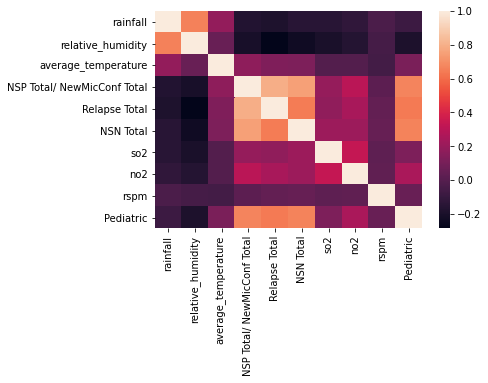

In [ ]:
sns.heatmap(value)

In [ ]:
scaled = scaler.fit_transform(final.values)

In [ ]:
scaled_df = pd.DataFrame(scaled , columns = final.columns)

In [ ]:
scaled_df.isna().sum()

AGRA         0
AIZAWL       0
ALAPPUZHA    0
ALLAHABAD    0
ALWAR        0
            ..
NSN Total    0
so2          0
no2          0
rspm         0
Pediatric    0
Length: 89, dtype: int64

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
regr = MLPRegressor(random_state=1 , learning_rate='adaptive' ,  max_iter=50 , verbose = True)

In [ ]:
regr.fit(scaled_df.drop('Pediatric' ,  axis = 1) , scaled_df['Pediatric'])

Iteration 1, loss = 0.01168623
Iteration 2, loss = 0.00398102
Iteration 3, loss = 0.00237069
Iteration 4, loss = 0.00197151
Iteration 5, loss = 0.00180493
Iteration 6, loss = 0.00170921
Iteration 7, loss = 0.00163490
Iteration 8, loss = 0.00157183
Iteration 9, loss = 0.00150338
Iteration 10, loss = 0.00144708
Iteration 11, loss = 0.00139520
Iteration 12, loss = 0.00135124
Iteration 13, loss = 0.00131550
Iteration 14, loss = 0.00128011
Iteration 15, loss = 0.00124115
Iteration 16, loss = 0.00121377
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='adaptive',
             learning_rate_init=0.001, max_fun=15000, max_iter=50, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=True, warm_start=False)

In [ ]:
y_pred = regr.predict(scaled_test_df)

In [ ]:
test = test.fillna(method ='bfill') 

In [ ]:
scaled_test = scaler.fit_transform(test.values)

In [ ]:
scaled_test_df = pd.DataFrame(scaled_test , columns = test.columns)

In [ ]:
scaled_test_df['Pediatric'] = y_pred

In [ ]:
Y = scaler.inverse_transform(scaled_test_df)

In [ ]:
test

,AGRA,AIZAWL,ALAPPUZHA,ALLAHABAD,ALWAR,AMRAVATI,AMRITSAR,BATHINDA,BHARUCH,BHOPAL,BULANDSHAHR,CACHAR,CHANDIGARH,CHENNAI,CHITTOOR,COIMBATORE,CUTTACK,DAKSHINAKANNADA,DEHRADUN,DHANBAD,DIBRUGARH,DURG,EASTKHASIHILLS,ERNAKULAM,FATEHGARHSAHIB,FIROZABAD,GANJAM,GHAZIABAD,GOLAGHAT,GUNTUR,GWALIOR,HASSAN,INDORE,JABALPUR,JAIPUR,JALANDHAR,JALGAON,JAMNAGAR,JHANSI,JODHPUR,...,LUDHIANA,MADURAI,MORADABAD,NAGPUR,NASHIK,NORTHGOA,PALAKKAD,PATIALA,PUNE,RAJKOT,RANCHI,RAYAGADA,SAGAR,SALEM,SANGLI,SIRMAUR,SOLAN,SOLAPUR,SONBHADRA,SONITPUR,SOUTHGOA,SURAT,THANE,THIRUVANANTHAPURAM,VADODARA,VALSAD,VARANASI,VISAKHAPATNAM,year,month,Rainfall,Relative Humidity,Average Temperature,NSP Total,Relapse Total,NSN Total,so2,no2,rspm,Pediatric
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,1,34.104885,38.800972,19.439224,589.80510,98.35493,321.47223,4.266817,19.016176,197.437200,0.11582
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,2,11.862205,22.539581,20.570960,679.25680,123.61379,369.89140,4.026891,20.378157,207.554900,0.11582
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,3,117.393654,29.516758,32.966130,765.24940,120.36663,205.59604,4.081528,20.484528,229.092270,0.11582
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,4,590.517640,76.134630,31.307750,608.72626,101.82116,191.81204,3.947581,18.359955,234.643570,0.11582
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24.797264,36.707874,19.105430,634.63120,106.91446,242.95451,3.982175,18.168934,218.121140,0.11582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2023,4,1426.400600,97.187710,27.317154,1061.15620,107.68849,193.21156,6.299015,13.337610,55.265408,0.11582
1844,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2024,1,210.520190,73.078130,24.143236,1109.51920,118.51423,216.72934,6.181479,12.902423,54.041416,0.11582
1845,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2024,2,63.020416,57.813250,27.808945,1150.91710,131.67221,241.56010,6.087507,12.862503,53.193733,0.11582
1846,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2024,3,714.588800,75.438350,32.855440,1148.24340,108.13781,184.75706,5.986800,12.870475,52.537240,0.11582


In [ ]:
output = pd.DataFrame(Y , columns = test.columns)

ValueError: ignored

In [ ]:
output.Pediatric.unique()

array([7.75995756])

In [ ]:
X = scaled_df.drop('Pediatric' , axis = 1)

In [ ]:
y = scaled_df['Pediatric']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
regr.fit(X_train , y_train)

Iteration 1, loss = 0.01112691
Iteration 2, loss = 0.00527491
Iteration 3, loss = 0.00312788
Iteration 4, loss = 0.00223953
Iteration 5, loss = 0.00187691
Iteration 6, loss = 0.00170042
Iteration 7, loss = 0.00159015
Iteration 8, loss = 0.00149700
Iteration 9, loss = 0.00144710
Iteration 10, loss = 0.00139065
Iteration 11, loss = 0.00134165
Iteration 12, loss = 0.00131208
Iteration 13, loss = 0.00127673
Iteration 14, loss = 0.00124522
Iteration 15, loss = 0.00120486
Iteration 16, loss = 0.00117835
Iteration 17, loss = 0.00114506
Iteration 18, loss = 0.00112676
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='adaptive',
             learning_rate_init=0.001, max_fun=15000, max_iter=50, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=True, warm_start=False)

In [ ]:
Y_Pred = regr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test , Y_Pred) # Pediatric Test

0.7897590661343549

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_test , Y_Pred) # Pediatric Test

0.038494365801911914

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test , Y_Pred)

0.0033547554208957753

In [ ]:
#TRAIN

In [ ]:
Y_TEST_PRED = regr.predict(X_train)

In [ ]:
r2_score(y_train , Y_TEST_PRED)

0.8555633748108437

In [ ]:
mean_absolute_error(y_train , Y_TEST_PRED)

0.03326864361937768

In [ ]:
mean_squared_error(y_train , Y_TEST_PRED)

0.0023613168462351787

In [ ]:
#GERIATRIC

In [ ]:
Y_Pred = regr.predict(X_test)

In [ ]:
r2_score(y_test , Y_Pred) # Geriatric Test

0.8193144757691313

In [ ]:
mean_absolute_error(y_test , Y_Pred) # Geriatric Test

0.038101475986051805

In [ ]:
mean_squared_error(y_test , Y_Pred) # Geriatric Test

0.0026547322578915488

In [ ]:
#TRAIN

In [ ]:
Y_TEST_PRED = regr.predict(X_train)

In [ ]:
r2_score(y_train , Y_TEST_PRED) # Geriatric Train

0.8687881476694277

In [ ]:
mean_absolute_error(y_train , Y_TEST_PRED)

0.03373544288325382

In [ ]:
mean_squared_error(y_train , Y_TEST_PRED)

0.0021145985675362832

In [ ]:
#HIV

In [ ]:
Y_Pred = regr.predict(X_test)

In [ ]:
r2_score(y_test , Y_Pred) # HIV Test

0.8006982328818886

In [ ]:
mean_absolute_error(y_test , Y_Pred) # HIV Test

0.02783984462512443

In [ ]:
mean_squared_error(y_test , Y_Pred) # HIV Test

0.0023010545139178435

In [ ]:
#TRAIN

In [ ]:
Y_TEST_PRED = regr.predict(X_train)

In [ ]:
r2_score(y_train , Y_TEST_PRED) # HIV Train

0.8528262181853886

In [ ]:
mean_absolute_error(y_train , Y_TEST_PRED)

0.02493055029489231

In [ ]:
mean_squared_error(y_train , Y_TEST_PRED)

0.00213585612264667

In [ ]:
regr.summary()

AttributeError: ignored